<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_09/Lecture_02/CodeAlong/01_24_clustering_for_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://course_report_production.s3.amazonaws.com/rich/rich_files/rich_files/2470/s300/cd-logo-blue-600x600.png" alt="Coding Dojo Logo" class="center" height="50">

# Clustering - Mini Hackathon Sample 

* Make a copy of this notebook to edit!

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.searchenginejournal.com%2Fwp-content%2Fuploads%2F2020%2F08%2Fcopy-the-colab-notebook-to-your-google-drive-5f2579179f746.jpg&f=1&nofb=1" alt="Make a copy" class="center" height="200">

</center>

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
def plot_k_values(data, ks):
  """plot the silhouette score and inertia 
  of a KMeans model for various k values"""

  sils = []
  inertias = []

  for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sils.append(silhouette_score(data, km.labels_))
    inertias.append(km.inertia_)
      
    # plot inertia and silhouette score
  fig, ax1 = plt.subplots(figsize=(9,7))
  ax1.set_xlabel('number of clusters')
  ax1.set_ylabel('Inertia', color = 'blue')
  ax1.plot(ks, inertias, color = 'blue',label='inertia',marker ='o')

  ax2 = ax1.twinx()
  
  ax2.set_ylabel('Silhouette Score', color = 'red')
  ax2.plot(ks, sils, color = 'red',label='silhouette score',marker='+')
  ax1.legend(loc=0)  
  ax2.legend(loc='upper left')
  plt.grid()
  plt.show()

  # fig, axes = plt.subplots(2,1, figsize=(8,5))
  # axes[0].plot(ks, inertias)
  # axes[0].set_xticks(ks)
  # axes[0].set_title('Inertia')
  # axes[1].plot(ks, sils)
  # axes[1].set_xticks(ks)
  # axes[1].set_title('Silhouette Score')
  # plt.tight_layout();

In [ ]:
# Load Data
mel = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT9qetZw-uGS1u44KiW-XOJJkhmX0BKPdcsQ_X9cwTHlsTvlBHbEyA5G_D8r9knBbPOQ7My-W4pTfy2/pub?gid=2140088293&single=true&output=csv')
mel.head()

,price,rooms,bed,bath,car,land,lat,long
0,1480000,2,2,1,1,202,-37.7996,144.9984
1,1035000,2,2,1,0,156,-37.8079,144.9934
2,1465000,3,3,2,0,134,-37.8093,144.9944
3,850000,3,3,2,1,94,-37.7969,144.9969
4,1600000,4,3,1,2,120,-37.8072,144.9941


In [ ]:
# check for null by info()
mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17501 entries, 0 to 17500
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   17501 non-null  int64  
 1   rooms   17501 non-null  int64  
 2   bed     17501 non-null  int64  
 3   bath    17501 non-null  int64  
 4   car     17501 non-null  int64  
 5   land    17501 non-null  int64  
 6   lat     17501 non-null  float64
 7   long    17501 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 1.1 MB


In [ ]:
# Check statistics 
mel.describe() 

,price,rooms,bed,bath,car,land,lat,long
count,1.750100e+04,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000
mean,1.061650e+06,3.040969,3.023941,1.571053,1.689732,592.388149,-37.806103,144.996005
std,5.600767e+05,0.936914,0.950157,0.687974,0.991600,3805.227151,0.089605,0.117395
min,8.500000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790
25%,6.570000e+05,2.000000,2.000000,1.000000,1.000000,220.000000,-37.859190,144.924400
50%,9.100000e+05,3.000000,3.000000,1.000000,2.000000,512.000000,-37.798500,145.002400
75%,1.325000e+06,4.000000,4.000000,2.000000,2.000000,662.000000,-37.748970,145.067600
max,3.450000e+06,12.000000,20.000000,9.000000,18.000000,433014.000000,-37.399460,145.526350


# Task 1: 

a. Cluster houses by location

b. Use clusters as a feature in supervised learning

## Validation Split

In [ ]:
# Without clusters
X = mel.drop(columns = ['price'])
y = mel['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
# Scale the data

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
X_train

,rooms,bed,bath,car,land,lat,long
0,-2.174291,-2.120948,-0.831409,-0.687083,-0.271535,-0.046037,-0.266371
1,-1.110176,-1.074120,-0.831409,-0.687083,7.767956,-0.330891,0.006564
2,-0.046061,-0.027292,2.069819,0.309205,-0.150476,-1.725927,0.594897
3,-0.046061,-0.027292,0.619205,0.309205,-0.173379,-0.029524,1.266962
4,1.018054,1.019536,2.069819,2.301783,0.053316,0.893434,0.204295
...,...,...,...,...,...,...,...
13995,-0.046061,-0.027292,0.619205,-0.687083,-0.220587,-0.088659,0.166011
13996,-0.046061,-0.027292,-0.831409,-0.687083,-0.199554,1.746768,-0.656632
13997,-0.046061,-0.027292,-0.831409,0.309205,0.021532,0.778511,0.715037
13998,2.082169,2.066364,0.619205,0.309205,0.069208,-1.256638,0.674962


## Visualize House Locations

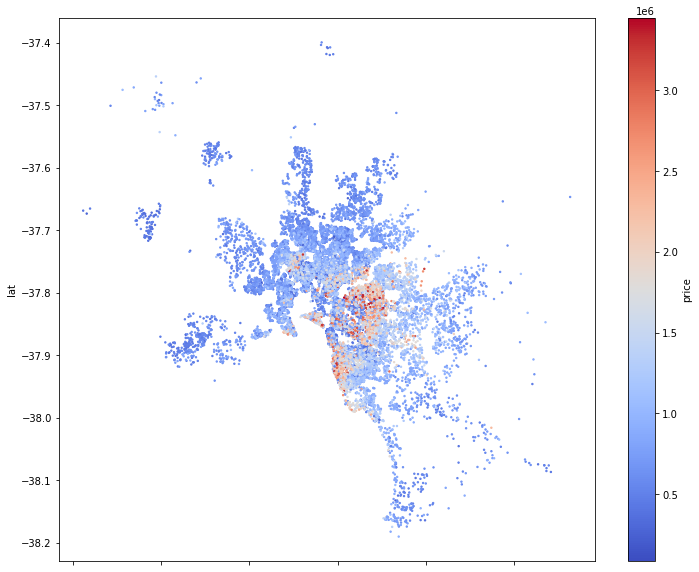

In [ ]:
# plot the houses by location, color by house prices
mel.plot(kind="scatter", x="long", y="lat", c="price",
         cmap="coolwarm", figsize=(12, 10), s=2);

## Cluster with KMeans

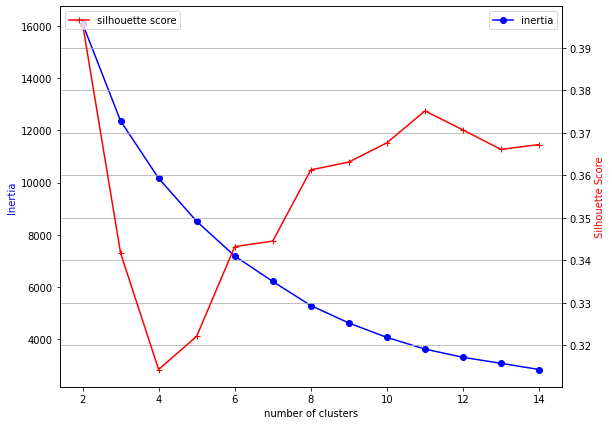

In [ ]:
# extract the location data
mel_loc = X_train[['lat', 'long']]

# find best k

ks = range(2,15)

plot_k_values(mel_loc, ks)


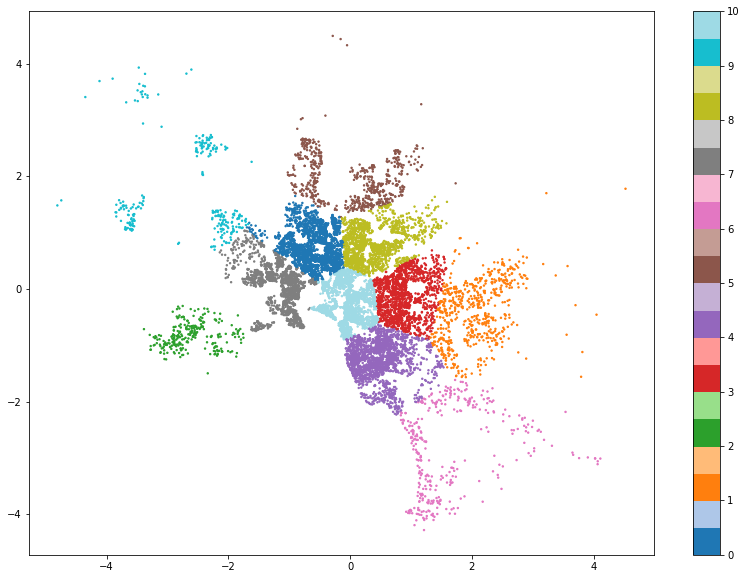

In [ ]:
km = KMeans(n_clusters=11, random_state=42)
km.fit(mel_loc)

# kmeans
plt.figure(figsize=(14,10))
plt.scatter( x=mel_loc["long"], y=mel_loc["lat"], c=km.labels_, 
         cmap = 'tab20', s=2)
ticks = np.sort(np.unique(km.labels_))
plt.colorbar(ticks=ticks);

In [ ]:
km = KMeans(n_clusters=9, random_state=42)
km.fit(mel_loc)

# kmeans
plt.figure(figsize=(14,10))
plt.scatter(x=mel_loc["long"], y=mel_loc["lat"], c=km.labels_, 
         cmap = 'tab20', s=2)
ticks = np.sort(np.unique(km.labels_))
plt.colorbar(ticks=ticks);

In [ ]:
# Using plotly to visulize houses based on location
import plotly.express as px
# Documentation: https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html
px.scatter_mapbox(mel, lat='lat',lon='long',color='price',
                  mapbox_style="open-street-map",)

## Test KMeans clusters in a model

In [ ]:
# Without clusters

model = LinearRegression()
model.fit(X_train, y_train)

print('Training r2:', model.score(X_train, y_train))
print('Testing r2:', model.score(X_test, y_test))

Training r2: 0.30284016936896363
Testing r2: 0.30161755877675733


In [ ]:
# Let's see what adding the Kmeans clusters does!

km = KMeans(n_clusters=9, random_state=42)

km.fit(X_train)

X_train['cluster'] = km.predict(X_train)

#Don't fit on test data!
X_test['cluster'] = km.predict(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

print('Training r2:', model.score(X_train, y_train))
print('Testing r2:', model.score(X_test, y_test))

Training r2: 0.3371429390988433
Testing r2: 0.32735142449782395


In [ ]:
# Let's see what adding the Kmeans clusters does!

km = KMeans(n_clusters=11, random_state=42)

km.fit(X_train[['lat','long']])

X_train['cluster'] = km.predict(X_train[['lat','long']])

#Don't fit on test data!
X_test['cluster'] = km.predict(X_test[['lat','long']])

model = LinearRegression()
model.fit(X_train, y_train)

print('Training r2:', model.score(X_train, y_train))
print('Testing r2:', model.score(X_test, y_test))

Training r2: 0.3072081582186793
Testing r2: 0.3068070046278424


# ⛔ Limitations:

It's not easy to put KMeans into a pipeline, so we cannot easily use with cross-validation without some amount of data leakage between folds.  The leakage is small, but it will result in some slight loss of confidence in the scores that things like GridSearchCV calculate.  However, if the above method is used, we can have confidence in a final model that is validated with the test set.

#  Your Turn!

[Challenge Notebook](https://colab.research.google.com/drive/1LYOd8nxAhVfQQ4YAsOpEgICwa-yFcMka?usp=sharing)